In [2]:
!kaggle datasets download -d jillanisofttech/fake-or-real-news

fake-or-real-news.zip: Skipping, found more recently modified local copy (use --force to force download)


In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
sns.set()

In [71]:
data = pd.read_csv('news_data/fake_or_real_news.csv')
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [72]:
data.isna().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

<AxesSubplot:>

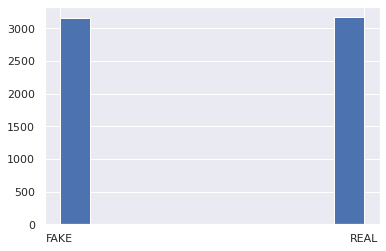

In [73]:
data['label'].hist()

In [172]:
title_text = data['title'].values + '\n' + data['text'].values
data['title_text'] = title_text
data.head()

,Unnamed: 0,title,text,label,title_text
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,You Can Smell Hillary’s Fear\nDaniel Greenfiel...
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,Watch The Exact Moment Paul Ryan Committed Pol...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,Kerry to go to Paris in gesture of sympathy\nU...
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,Bernie supporters on Twitter erupt in anger ag...
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,The Battle of New York: Why This Primary Matte...


In [187]:
X = data['title_text'].copy(deep=True)
y = data['label'].copy(deep=True)
y = y.replace(['FAKE', 'REAL'], [0, 1])
print(X.shape)
print(y.shape)

(6335,)
(6335,)


In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (5068,)
y_train shape: (5068,)
X_test shape: (1267,)
y_test shape: (1267,)


In [189]:
tf_idf = TfidfVectorizer(stop_words='english', max_df=0.75)
cls = PassiveAggressiveClassifier(max_iter=100)

In [190]:
cls_pipeline = Pipeline([('vect', tf_idf), ('cls', cls)])
cls_pipeline.fit(X_train, y_train)

Pipeline(steps=[('vect', TfidfVectorizer(max_df=0.75, stop_words='english')),
                ('cls', PassiveAggressiveClassifier(max_iter=100))])

In [191]:
y_pred = cls_pipeline.predict(X_test)
score = accuracy_score(y_test, y_pred)
print('Accuracy: %.3f' % score)

target_names = ['FAKE', 'REAL']
print(classification_report(y_test, y_pred, target_names=target_names))

Accuracy: 0.935
              precision    recall  f1-score   support

        FAKE       0.93      0.94      0.93       628
        REAL       0.94      0.93      0.94       639

    accuracy                           0.94      1267
   macro avg       0.94      0.94      0.94      1267
weighted avg       0.94      0.94      0.94      1267



In [185]:
# inspo from: https://www.stackvidhya.com/plot-confusion-matrix-in-python-and-why/
def plot_cm(cm, title = 'Confusion Matrix'):
    group_counts = ["{0:0.0f}".format(value) for value in
    cm.flatten()]
    
    group_percentages = ["{0:.2%}".format(value) for value in
    cm.flatten()/np.sum(cm)]
    
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    
    ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

    ax.set_title(title +'\n')
    ax.set_xlabel('\nPredicted Label')
    ax.set_ylabel('True Label')

    ax.xaxis.set_ticklabels(['FAKE','REAL'])
    ax.yaxis.set_ticklabels(['FAKE','REAL'])
    plt.show()

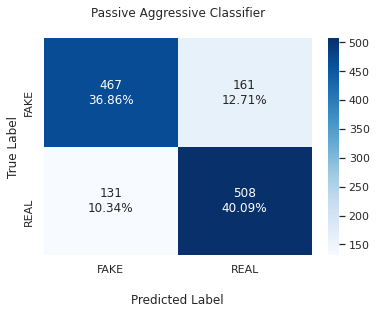

In [186]:
cm = confusion_matrix(y_test,y_pred)
plot_cm(cm, 'Passive Aggressive Classifier')

In [171]:
import pickle
pickle.dump(cls_pipeline, open('PAC_model.sav', 'wb'))
 
#loaded_model = pickle.load(open('PAC_model.sav', 'rb'))